In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


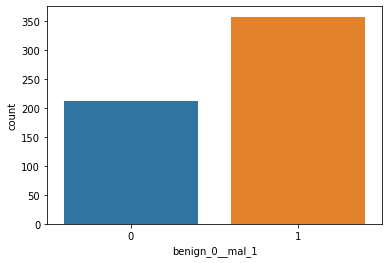

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

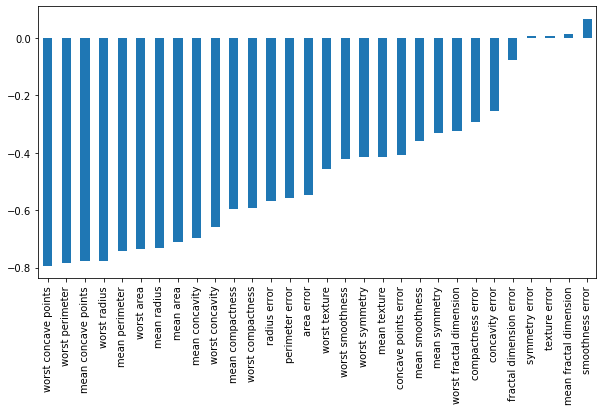

In [6]:
plt.figure(figsize=(10,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

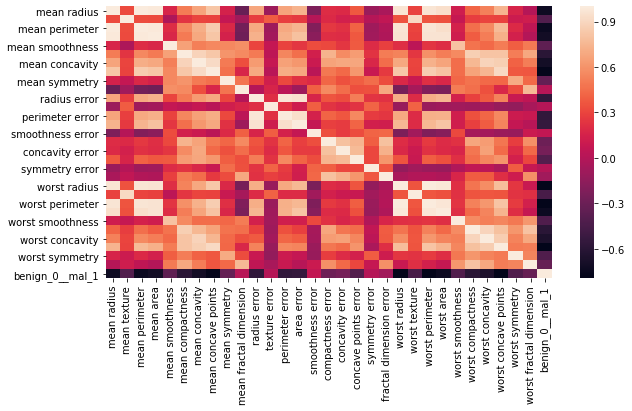

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [8]:
x = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
x_train = scaler.fit_transform(x_train)

In [14]:
x_test =scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense,Dropout,Activation

In [17]:
x_train.shape

(426, 30)

In [18]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1
          )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6861 - val_loss: 0.6574
Epoch 2/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6550 - val_loss: 0.6345
Epoch 3/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6311 - val_loss: 0.6075
Epoch 4/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6037 - val_loss: 0.5778
Epoch 5/600
426/426 [==============================] - 0s 114us/sample - loss: 0.5731 - val_loss: 0.5420
Epoch 6/600
426/426 [==============================] - 0s 140us/sample - loss: 0.5336 - val_loss: 0.4963
Epoch 7/600
426/426 [==============================] - 0s 98us/sample - loss: 0.4909 - val_loss: 0.4506
Epoch 8/600
426/426 [==============================] - 0s 118us/sample - loss: 0.4445 - val_loss: 0.4042
Epoch 9/600
426/426 [===

426/426 [==============================] - 0s 115us/sample - loss: 0.0590 - val_loss: 0.1278
Epoch 75/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0585 - val_loss: 0.1222
Epoch 76/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0578 - val_loss: 0.1186
Epoch 77/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0571 - val_loss: 0.1223
Epoch 78/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0575 - val_loss: 0.1204
Epoch 79/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0578 - val_loss: 0.1296
Epoch 80/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0569 - val_loss: 0.1187
Epoch 81/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0594 - val_loss: 0.1194
Epoch 82/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0604 - val_loss: 0.1266
Epoch 83/600
426/426 [==============================] - 0s 2

Epoch 151/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0467 - val_loss: 0.1254
Epoch 152/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0472 - val_loss: 0.1376
Epoch 153/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0473 - val_loss: 0.1269
Epoch 154/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0482 - val_loss: 0.1252
Epoch 155/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0506 - val_loss: 0.1335
Epoch 156/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0473 - val_loss: 0.1256
Epoch 157/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0470 - val_loss: 0.1259
Epoch 158/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0465 - val_loss: 0.1211
Epoch 159/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0505 - val_loss: 0.1270
Epoch 160/600
426/426 [===============

426/426 [==============================] - 0s 85us/sample - loss: 0.0456 - val_loss: 0.1491
Epoch 228/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0476 - val_loss: 0.1366
Epoch 229/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0457 - val_loss: 0.1312
Epoch 230/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0398 - val_loss: 0.1490
Epoch 231/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0381 - val_loss: 0.1256
Epoch 232/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0429 - val_loss: 0.1568
Epoch 233/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0396 - val_loss: 0.1307
Epoch 234/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0386 - val_loss: 0.1390
Epoch 235/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0388 - val_loss: 0.1364
Epoch 236/600
426/426 [==============================]

426/426 [==============================] - 0s 122us/sample - loss: 0.0383 - val_loss: 0.1373
Epoch 304/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0364 - val_loss: 0.1359
Epoch 305/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0348 - val_loss: 0.1515
Epoch 306/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0339 - val_loss: 0.1332
Epoch 307/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0358 - val_loss: 0.1575
Epoch 308/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0376 - val_loss: 0.1415
Epoch 309/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0338 - val_loss: 0.1460
Epoch 310/600
426/426 [==============================] - 0s 226us/sample - loss: 0.0359 - val_loss: 0.1497
Epoch 311/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0339 - val_loss: 0.1467
Epoch 312/600
426/426 [============================

426/426 [==============================] - 0s 187us/sample - loss: 0.0286 - val_loss: 0.1517
Epoch 380/600
426/426 [==============================] - ETA: 0s - loss: 0.021 - 0s 200us/sample - loss: 0.0293 - val_loss: 0.1576
Epoch 381/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0301 - val_loss: 0.1808
Epoch 382/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0290 - val_loss: 0.1573
Epoch 383/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0272 - val_loss: 0.1538
Epoch 384/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0285 - val_loss: 0.1510
Epoch 385/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0276 - val_loss: 0.1562
Epoch 386/600
426/426 [==============================] - ETA: 0s - loss: 0.029 - 0s 192us/sample - loss: 0.0279 - val_loss: 0.1442
Epoch 387/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0276 - val_loss: 0.1509
Epo

426/426 [==============================] - 0s 195us/sample - loss: 0.0246 - val_loss: 0.1691
Epoch 456/600
426/426 [==============================] - 0s 199us/sample - loss: 0.0267 - val_loss: 0.1609
Epoch 457/600
426/426 [==============================] - 0s 205us/sample - loss: 0.0486 - val_loss: 0.1499
Epoch 458/600
426/426 [==============================] - 0s 197us/sample - loss: 0.0347 - val_loss: 0.1778
Epoch 459/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0475 - val_loss: 0.1645
Epoch 460/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0277 - val_loss: 0.1724
Epoch 461/600
426/426 [==============================] - 0s 205us/sample - loss: 0.0288 - val_loss: 0.1460
Epoch 462/600
426/426 [==============================] - 0s 217us/sample - loss: 0.0285 - val_loss: 0.1696
Epoch 463/600
426/426 [==============================] - 0s 226us/sample - loss: 0.0230 - val_loss: 0.1583
Epoch 464/600
426/426 [============================

426/426 [==============================] - 0s 186us/sample - loss: 0.0191 - val_loss: 0.1710
Epoch 532/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0194 - val_loss: 0.1647
Epoch 533/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0192 - val_loss: 0.1731
Epoch 534/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0195 - val_loss: 0.1664
Epoch 535/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0192 - val_loss: 0.1742
Epoch 536/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0185 - val_loss: 0.1775
Epoch 537/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0183 - val_loss: 0.1636
Epoch 538/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0233 - val_loss: 0.1975
Epoch 539/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0217 - val_loss: 0.1569
Epoch 540/600
426/426 [==============================] - 

In [20]:
model_loss = pd.DataFrame(model.history.history)

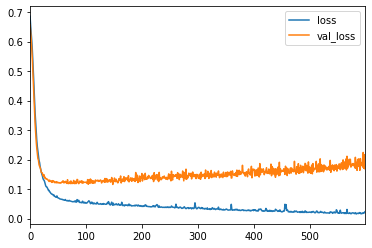

In [21]:
model_loss.plot()

In [22]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))
#sig
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [25]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6741 - val_loss: 0.6489
Epoch 2/600
426/426 [==============================] - 0s 105us/sample - loss: 0.6314 - val_loss: 0.6034
Epoch 3/600
426/426 [==============================] - 0s 111us/sample - loss: 0.5870 - val_loss: 0.5566
Epoch 4/600
426/426 [==============================] - 0s 122us/sample - loss: 0.5377 - val_loss: 0.5076
Epoch 5/600
426/426 [==============================] - 0s 116us/sample - loss: 0.4890 - val_loss: 0.4543
Epoch 6/600
426/426 [==============================] - 0s 103us/sample - loss: 0.4370 - val_loss: 0.4016
Epoch 7/600
426/426 [==============================] - 0s 98us/sample - loss: 0.3891 - val_loss: 0.3534
Epoch 8/600
426/426 [==============================] - 0s 118us/sample - loss: 0.3462 - val_loss: 0.3132
Epoch 9/600
426/426 [==============================] - 0s 109us/sample - loss: 0.3096 - val_loss: 0.2789
Epoch 10/600

In [26]:
model_loss = pd.DataFrame(model.history.history)

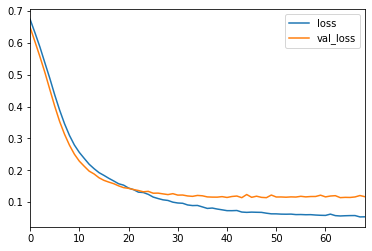

In [27]:
model_loss.plot()

In [28]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
# sigmoid is for binary classification
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=600,
          validation_data=(x_test, y_test), verbose=1,callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7958 - val_loss: 0.7222
Epoch 2/600
426/426 [==============================] - 0s 132us/sample - loss: 0.7286 - val_loss: 0.6938
Epoch 3/600
426/426 [==============================] - 0s 121us/sample - loss: 0.6999 - val_loss: 0.6710
Epoch 4/600
426/426 [==============================] - 0s 133us/sample - loss: 0.6777 - val_loss: 0.6476
Epoch 5/600
426/426 [==============================] - 0s 140us/sample - loss: 0.6544 - val_loss: 0.6279
Epoch 6/600
426/426 [==============================] - 0s 135us/sample - loss: 0.6308 - val_loss: 0.6077
Epoch 7/600
426/426 [==============================] - 0s 160us/sample - loss: 0.6172 - val_loss: 0.5855
Epoch 8/600
426/426 [==============================] - 0s 158us/sample - loss: 0.6025 - val_loss: 0.5580
Epoch 9/600
426/426 [==============================] - 0s 153us/sample - loss: 0.5740 - val_loss: 0.5319
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1374 - val_loss: 0.1087
Epoch 79/600
426/426 [==============================] - 0s 237us/sample - loss: 0.1279 - val_loss: 0.1141
Epoch 80/600
426/426 [==============================] - 0s 246us/sample - loss: 0.1137 - val_loss: 0.1059
Epoch 81/600
426/426 [==============================] - 0s 234us/sample - loss: 0.1325 - val_loss: 0.1060
Epoch 82/600
426/426 [==============================] - 0s 238us/sample - loss: 0.1085 - val_loss: 0.1132
Epoch 83/600
426/426 [==============================] - 0s 223us/sample - loss: 0.1144 - val_loss: 0.1124
Epoch 84/600
426/426 [==============================] - 0s 210us/sample - loss: 0.1213 - val_loss: 0.1053
Epoch 85/600
426/426 [==============================] - 0s 194us/sample - loss: 0.1352 - val_loss: 0.1086
Epoch 86/600
426/426 [==============================] - 0s 219us/sample - loss: 0.1223 - val_loss: 0.1158
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 235us/sample - loss: 0.1021 - val_loss: 0.1048
Epoch 156/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0741 - val_loss: 0.1116
Epoch 157/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0729 - val_loss: 0.1110
Epoch 158/600
426/426 [==============================] - 0s 251us/sample - loss: 0.0653 - val_loss: 0.1148
Epoch 159/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0747 - val_loss: 0.1102
Epoch 160/600
426/426 [==============================] - 0s 238us/sample - loss: 0.0844 - val_loss: 0.1191
Epoch 161/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0857 - val_loss: 0.1108
Epoch 162/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0874 - val_loss: 0.1162
Epoch 163/600
426/426 [==============================] - 0s 269us/sample - loss: 0.0870 - val_loss: 0.1084
Epoch 164/600
426/426 [==============

In [30]:
model_loss = pd.DataFrame(model.history.history)


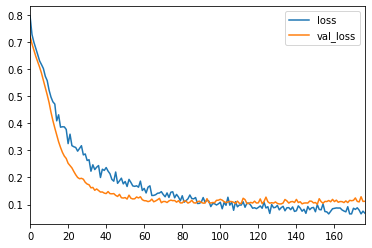

In [31]:
model_loss.plot()

In [33]:
predictions = model.predict_classes(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [ ]:
# end